<a href="https://colab.research.google.com/github/AlessandroU10/Alessandro_files/blob/master/no-show-appointments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-------------------------------------
# **Project Final: Investigate a Dataset (No Show Appointments)**
Alesandro Paredes Zenteno IMT 2-2023
-------------------------------------

--------------------
## **Context**
--------------------
El proyecto "No Shows Appointment ", utiliza un conjunto de datos de 100,000 citas médicas en Brasil. El csv incluye información sobre identificación del paciente, género, edad, ubicación del hospital, inscripción en programas de bienestar, condiciones de salud como diabetes y hipertensión, recepción de SMS y asistencia a la cita.

------------------
## **Objective**
------------------
El objetivo de este análisis es identificar los factores clave que contribuyen a la inasistencia de los pacientes a sus citas médicas programadas.
------------------
------------------
## **Key Questions**
------------------
1. ¿De qué manera se relaciona el género con la asistencia o ausencia en una cita?
2. ¿Cuántos pacientes son alcohólicos?
3. ¿Reducen los SMS de confirmación y recordatorio las inasistencias?
4. ¿En qué vecindarios se registra el mayor número de personas que no asisten a la escuela?
5. ¿La edad tiene un impacto en la asistencia?
------------------------------------
## **Dataset Description**
------------------------------------

Este conjunto de datos recopila información sobre 100,000 registros de citas médicas de diferentes pacientes en Brasil en 2016. El objetivo principal es determinar si los pacientes logran cumplir con su planificación de citas o no.
El conjunto de datos consta de 14 variables:

  * **PatientId:** int, Identificación del paciente.
  * **AppointmentID:** int, Identificación de la cita.
  * **Gender:** string, Sexo del paciente.
  * **ScheduledDay:** date, Fecha en que el paciente programó la cita.
  * **AppointementDay:** date, Fecha de la cita.
  * **Age:** int, Edad del paciente.
  * **Neighbourhood:** string, Ubicación del hospital.
  * **Scholarship:** variable binaria, Indica si el paciente está inscrito en el programa de bienestar o no.
  * **Hipertension:** Variable binaria, Indica si el paciente tiene hipertensión o no.
  * **Diabetes:** Variable binaria, Indica si el paciente tiene diabetes o no.
  * **Alcoholism:** Variable binaria, Indica si el paciente es alcohólico o no.
  * **Handcap:** Variable binaria, Indica si el paciente tiene alguna discapacidad o no.
  * **SMS_received:** Variable binaria, Indica si el paciente recibió un SMS de alerta o no.
  * **NO-show:** Indica si el paciente cumplió con su planificación de citas o no.

##  **Importing the necessary libraries and overview of the dataset**

In [ ]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to extract datetime features
import datetime as dt

import os

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


### **Loading the dataset**

In [ ]:
data = pd.read_csv('/gdrive/MyDrive/Colab_Notebooks/noshowappointments-kagglev2-may-2016.csv')

In [ ]:
# Copying data to another variable to avoid any changes to the original data
df = data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### **View the first 5 rows of the dataset**

In [ ]:
# Looking at head (the first 5 observations)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2987249982429600.00%,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,55899777669443800.00%,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,426296229995100.00%,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,86795121317400.00%,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,884118644818300.00%,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### **View the last 5 rows of the dataset**

In [ ]:
# Looking at tail (the last 5 observations)
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,257213436929300.00%,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,359626632873500.00%,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1557663172989300.00%,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9213493143555700.00%,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,37751151812112704.00%,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [ ]:
df.count()

PatientId         110527
AppointmentID     110527
Gender            110527
ScheduledDay      110527
AppointmentDay    110527
Age               110527
Neighbourhood     110527
Scholarship       110527
Hipertension      110527
Diabetes          110527
Alcoholism        110527
Handcap           110527
SMS_received      110527
No-show           110527
dtype: int64

In [ ]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### **Checking the shape of the dataset**

In [ ]:
print('Number of rows   : ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows   :  110527
Number of columns:  14


### **Checking the info() and dType**

In [ ]:
df.info()

df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

### **Summary of the data**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,11052700.00%,14749626571039406.00%,25609492029173908.00%,3921784.44%,417261444419200.00%,3173183871397800.00%,9439172089817500.00%,99998163177242704.00%
AppointmentID,11052700.00%,567530512.34%,7129575.15%,503023000.00%,564028550.00%,568057300.00%,572552350.00%,579048400.00%
Age,11052700.00%,3708.89%,2311.02%,-100.00%,1800.00%,3700.00%,5500.00%,11500.00%
Scholarship,11052700.00%,9.83%,29.77%,0.00%,0.00%,0.00%,0.00%,100.00%
Hipertension,11052700.00%,19.72%,39.79%,0.00%,0.00%,0.00%,0.00%,100.00%
Diabetes,11052700.00%,7.19%,25.83%,0.00%,0.00%,0.00%,0.00%,100.00%
Alcoholism,11052700.00%,3.04%,17.17%,0.00%,0.00%,0.00%,0.00%,100.00%
Handcap,11052700.00%,2.22%,16.15%,0.00%,0.00%,0.00%,0.00%,400.00%
SMS_received,11052700.00%,32.10%,46.69%,0.00%,0.00%,0.00%,100.00%,100.00%


### **Cleaning data**

In [ ]:
df.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day',
              'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension',
              'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

In [ ]:
df.drop_duplicates(subset='patient_id', keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110527 non-null  float64
 1   appointment_id   110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighbourhood    110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hypertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handicap         110527 non-null  int64  
 12  sms_received     110527 non-null  int64  
 13  no_show          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
df.rename(columns={"no_show" : "show"}, inplace=True)
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'show'],
      dtype='object')

In [ ]:
df['show'] = df['show'].map({'Yes':'yes' ,'No':'no'})
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
0,2987249982429600.00%,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,no
1,55899777669443800.00%,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,no
2,426296229995100.00%,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,no
3,86795121317400.00%,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,no
4,884118644818300.00%,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,no


In [ ]:
df.head(10)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
0,2987249982429600.00%,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,no
1,55899777669443800.00%,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,no
2,426296229995100.00%,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,no
3,86795121317400.00%,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,no
4,884118644818300.00%,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,no
5,9598513323127400.00%,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,no
6,73368816447666096.00%,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,yes
7,344983339412300.00%,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,yes
8,5639472994997200.00%,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,no
9,7812456436929700.00%,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,no


In [ ]:
df['show'].value_counts()

no     88208
yes    22319
Name: show, dtype: int64

In [ ]:
df[df["age"] < 0]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
99832,46594315873129296.00%,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,no


In [ ]:
df[df['age'] == 0].shape


(3539, 14)

In [ ]:
df.drop(df.query('age == 0').index, axis=0, inplace=True)

In [ ]:
df.drop(df.query('age == -1').index, axis=0, inplace=True)

In [ ]:
df.age.describe()

count   10698700.00%
mean        3831.61%
std         2246.62%
min          100.00%
25%         1900.00%
50%         3800.00%
75%         5600.00%
max        11500.00%
Name: age, dtype: float64

In [ ]:
df[['scheduled_day', 'appointment_day']] = df[['scheduled_day', 'appointment_day']].apply(pd.to_datetime)

In [ ]:
df[['scheduled_day', 'appointment_day']].head()

,scheduled_day,appointment_day
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00
2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00
3,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00
4,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00


In [ ]:
df['gender'].replace({'M':'male', 'F':'female'}, inplace=True)

In [ ]:
df[['scholarship', 'hypertension', 'diabetes', 'handicap' ]] = df[['scholarship', 'hypertension', 'diabetes', 'handicap']].replace({0:'No', 1:'Yes'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       106987 non-null  float64            
 1   appointment_id   106987 non-null  int64              
 2   gender           106987 non-null  object             
 3   scheduled_day    106987 non-null  datetime64[ns, UTC]
 4   appointment_day  106987 non-null  datetime64[ns, UTC]
 5   age              106987 non-null  int64              
 6   neighbourhood    106987 non-null  object             
 7   scholarship      106987 non-null  object             
 8   hypertension     106987 non-null  object             
 9   diabetes         106987 non-null  object             
 10  alcoholism       106987 non-null  int64              
 11  handicap         106987 non-null  object             
 12  sms_received     106987 non-null  int64              
 13 

In [ ]:
df

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
0,2987249982429600.00%,5642903,female,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,No,Yes,No,0,No,0,no
1,55899777669443800.00%,5642503,male,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,No,No,No,0,No,0,no
2,426296229995100.00%,5642549,female,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,No,No,No,0,No,0,no
3,86795121317400.00%,5642828,female,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,No,No,No,0,No,0,no
4,884118644818300.00%,5642494,female,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,No,Yes,Yes,0,No,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,257213436929300.00%,5651768,female,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,No,No,No,0,No,1,no
110523,359626632873500.00%,5650093,female,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,No,No,No,0,No,1,no
110524,1557663172989300.00%,5630692,female,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,No,No,No,0,No,1,no
110525,9213493143555700.00%,5630323,female,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,No,No,No,0,No,1,no


### **Add column of group by age**

In [ ]:
labels = ['ninos','jovenes','adultos','ancianos']
age_groups = [0,17,35,59,150]
df['AgeGroup'] = pd.cut(x=df['age'],bins=age_groups,labels=labels, right=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       106987 non-null  float64            
 1   appointment_id   106987 non-null  int64              
 2   gender           106987 non-null  object             
 3   scheduled_day    106987 non-null  datetime64[ns, UTC]
 4   appointment_day  106987 non-null  datetime64[ns, UTC]
 5   age              106987 non-null  int64              
 6   neighbourhood    106987 non-null  object             
 7   scholarship      106987 non-null  object             
 8   hypertension     106987 non-null  object             
 9   diabetes         106987 non-null  object             
 10  alcoholism       106987 non-null  int64              
 11  handicap         106987 non-null  object             
 12  sms_received     106987 non-null  int64              
 13 

---

## **Exploratory Data Analysis**

---




### **¿De qué manera se relaciona el género con la asistencia o ausencia an una cita?**


> Bloque con sangría














In [ ]:
pacientes = df['show'].value_counts()
pacientes

no     85307
yes    21680
Name: show, dtype: int64

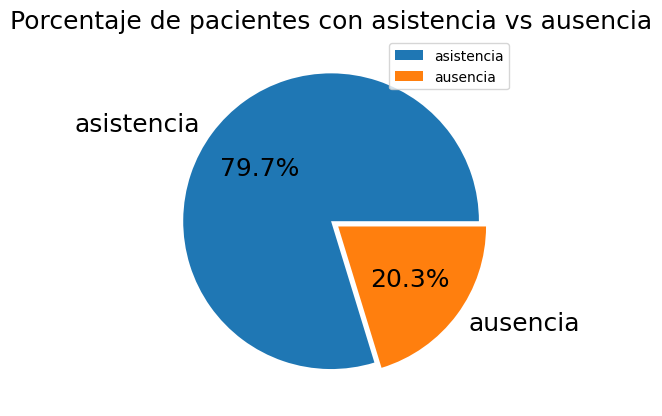

In [ ]:
plt.pie(pacientes,labels=["asistencia", "ausencia"], autopct='%1.1f%%', textprops={'fontsize': 18},explode = (0, 0.06))
plt.rcParams['font.size'] = 10
plt.title("Porcentaje de pacientes con asistencia vs ausencia",fontsize=18)
plt.legend()
plt.show()

In [ ]:
pd.set_option('display.float_format', '{:.2%}'.format)
def porcentaje_show(column):
    column_df = df.groupby(column)['show'].value_counts(normalize=True).\
    reset_index(name='porcentaje')
    return column_df

In [ ]:
df_gender = porcentaje_show(df['gender'])
df_gender

,gender,show,porcentaje
0,female,no,79.64%
1,female,yes,20.36%
2,male,no,79.92%
3,male,yes,20.08%


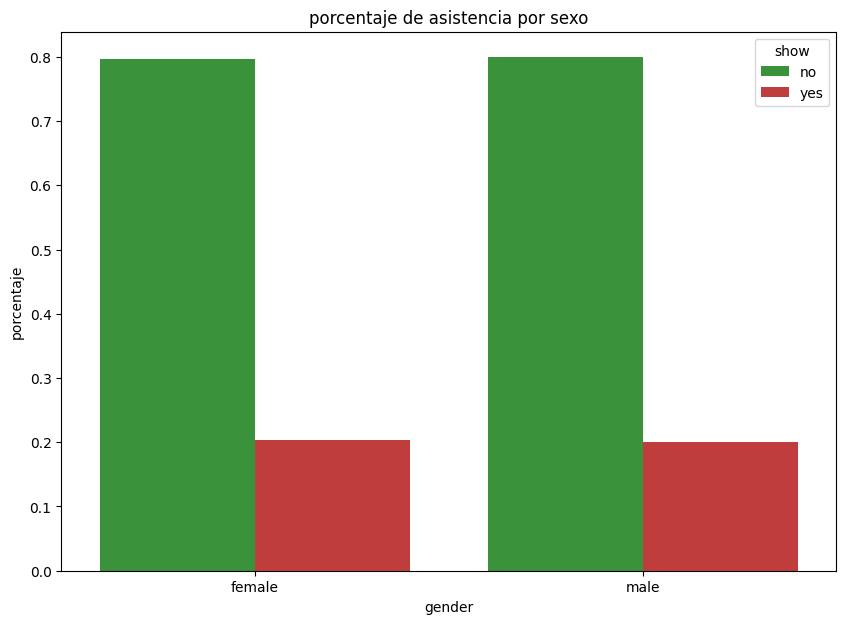

In [ ]:
plt.figure(figsize=[10,7])
sns.barplot(data=df_gender,x='gender',y='porcentaje',hue='show',
            palette=['tab:green','tab:red'])
plt.title('porcentaje de asistencia por sexo')
plt.show()

In [ ]:
males= df.query('gender == "male"').gender.value_counts()
females= df.query('gender == "female"').gender.value_counts()

print(males)
print(females)

male    36869
Name: gender, dtype: int64
female    70118
Name: gender, dtype: int64



Se observa que la proporción de inasistencia a las citas programadas es similar entre hombres y mujeres, lo cual sugiere que el género no constituye un factor determinante en las ausencias a dichas citas.

Por otro lado, el número de citas registradas por mujeres supera al de los hombres, lo cual indica una mayor frecuencia de programación de citas médicas por parte del género femenino. Sin embargo, al considerar la proporción de asistencia en términos porcentuales, ambos géneros muestran una igualdad en la asistencia a sus compromisos médicos programados.



### **¿Cuántos pacientes son alcohólicos?**

In [ ]:
df['gender'].value_counts()

female    70118
male      36869
Name: gender, dtype: int64

In [ ]:
df_alc = df.query('alcoholism == 1')
df_alc

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,AgeGroup
46,13794369633800.00%,5615608,male,2016-04-25 12:44:36+00:00,2016-04-29 00:00:00+00:00,58,SÃO CRISTÓVÃO,No,Yes,No,1,No,1,no,adultos
131,4755937544849800.00%,5637150,male,2016-04-28 17:38:06+00:00,2016-04-29 00:00:00+00:00,29,PRAIA DO SUÁ,No,No,No,1,No,0,yes,jovenes
133,358718599685600.00%,5580520,male,2016-04-14 07:07:10+00:00,2016-04-29 00:00:00+00:00,69,PRAIA DO SUÁ,No,No,Yes,1,No,0,no,ancianos
186,7329661162843200.00%,5587737,male,2016-04-15 09:02:16+00:00,2016-04-29 00:00:00+00:00,66,REDENÇÃO,No,Yes,No,1,No,0,no,ancianos
207,6359795533239900.00%,5642700,male,2016-04-29 16:49:22+00:00,2016-04-29 00:00:00+00:00,46,MARUÍPE,No,No,No,1,No,0,no,adultos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110071,9648483472295100.00%,5758772,male,2016-06-01 11:08:40+00:00,2016-06-06 00:00:00+00:00,54,BONFIM,No,Yes,No,1,No,1,no,adultos
110167,97331598261300.00%,5756807,male,2016-06-01 08:41:48+00:00,2016-06-03 00:00:00+00:00,64,BOA VISTA,No,No,No,1,No,0,no,ancianos
110168,565462651943200.00%,5756834,male,2016-06-01 08:42:49+00:00,2016-06-03 00:00:00+00:00,50,SANTO ANTÔNIO,No,Yes,Yes,1,No,0,yes,adultos
110174,794254922784900.00%,5741957,male,2016-05-30 07:36:20+00:00,2016-06-02 00:00:00+00:00,59,SÃO BENEDITO,No,Yes,No,1,No,1,no,ancianos


In [ ]:
df_alc_pie = df_alc['gender'].value_counts()
df_alc_pie

male      2137
female    1223
Name: gender, dtype: int64

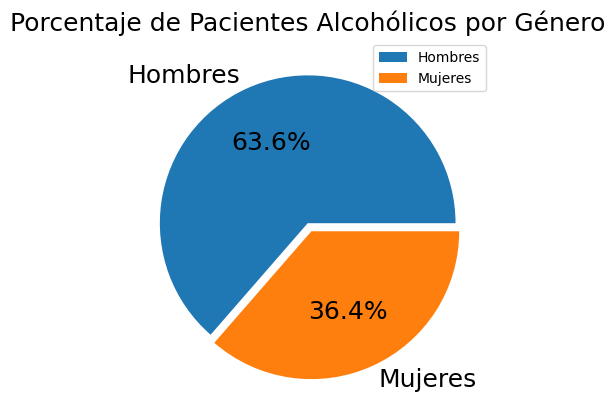

In [ ]:
plt.pie(df_alc_pie,labels=["Hombres", "Mujeres"], autopct='%1.1f%%', textprops={'fontsize': 18},explode = (0, 0.06))
plt.rcParams['font.size'] = 10
plt.title("Porcentaje de Pacientes Alcohólicos por Género",fontsize=18)
plt.legend()
plt.show()

El 63.6% de los pacientes alcohólicos son hombres, lo que corresponde a 2,137 individuos.
El 36.4% de los pacientes alcohólicos son mujeres, lo que corresponde a 1,223 individuos.

In [ ]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,AgeGroup
0,2987249982429600.00%,5642903,female,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,No,Yes,No,0,No,0,no,ancianos
1,55899777669443800.00%,5642503,male,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,No,No,No,0,No,0,no,adultos
2,426296229995100.00%,5642549,female,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,No,No,No,0,No,0,no,ancianos
3,86795121317400.00%,5642828,female,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,No,No,No,0,No,0,no,ninos
4,884118644818300.00%,5642494,female,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,No,Yes,Yes,0,No,0,no,adultos


### **¿Reducen los SMS de confirmación y recordatorio las inasistencias?**

In [ ]:
showed = df[df['show']=='no']
not_showed = df[df['show']=='yes']

In [ ]:
cantidad_nots = df['sms_received'].value_counts()
cantidad_nots

0    72402
1    34585
Name: sms_received, dtype: int64

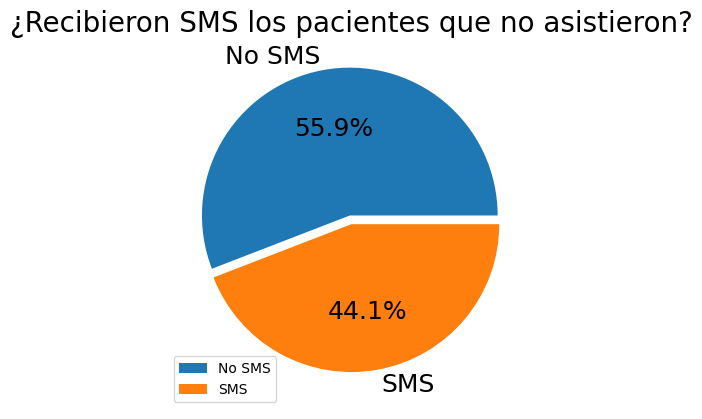

In [ ]:
sms_counts = not_showed['sms_received'].value_counts()
plt.pie(sms_counts, labels=['No SMS','SMS'], autopct='%1.1f%%', textprops={'fontsize': 18}, explode=(0.06, 0))
plt.rcParams['font.size'] = 10
plt.title("¿Recibieron SMS los pacientes que no asistieron?", fontsize=20)
plt.legend()
plt.show()


In [ ]:
sms_counts

0    12112
1     9568
Name: sms_received, dtype: int64

La gráfica muestra que el 55.9% de los pacientes que no asistieron a su cita no recibieron un SMS recordatorio, mientras que el 44.1% sí lo recibió. Esto sugiere que una cantidad significativa de pacientes no asistentes estaba al tanto de su cita a través de un SMS, pero aún así no acudieron. Sin embargo, la mayoría de los pacientes que faltaron a su cita no recibieron un SMS, lo que podría indicar que enviar recordatorios por SMS podría tener un impacto positivo en la asistencia a las citas.

### **¿En qué vecindarios se registra el mayor número de inasistencias?**

In [ ]:
df['neighbourhood'].value_counts()

JARDIM CAMBURI                 7586
MARIA ORTIZ                    5563
RESISTÊNCIA                    4235
JARDIM DA PENHA                3851
ITARARÉ                        3412
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

In [ ]:
df_neighbourhood = porcentaje_show(df['neighbourhood'])
df_neighbourhood = df_neighbourhood.sort_values(by=['show','porcentaje'], ascending=False)
df_neighbourhood = df_neighbourhood[:25]
df_neighbourhood


,neighbourhood,show,porcentaje
68,ILHAS OCEÂNICAS DE TRINDADE,yes,100.00%
139,SANTOS DUMONT,yes,29.14%
121,SANTA CECÍLIA,yes,27.09%
123,SANTA CLARA,yes,26.61%
72,ITARARÉ,yes,26.32%
80,JESUS DE NAZARETH,yes,24.86%
67,ILHA DO PRÍNCIPE,yes,23.63%
19,CARATOÍRA,yes,23.54%
3,ANDORINHAS,yes,23.19%
57,HORTO,yes,22.89%


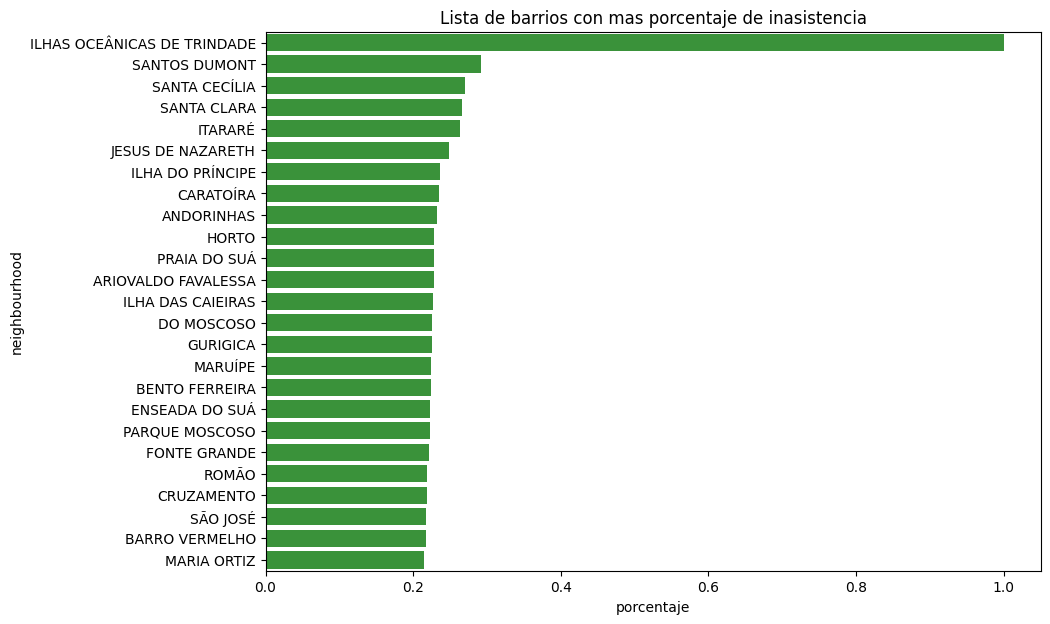

In [ ]:
plt.figure(figsize=[10,7])
sns.barplot(data=df_neighbourhood,y='neighbourhood',x='porcentaje',
            color='tab:green')
plt.title('Lista de barrios con mas porcentaje de inasistencia');

La gráfica muestra un listado de barrios ordenados por el porcentaje de inasistencia a citas médicas. El barrio "ILHAS OCEÂNICAS DE TRINDADE" tiene el porcentaje más alto de inasistencia, llegando al 100% ya que no registra ningún paciente que haya asistido a su cita. Los otros barrios muestran diferentes grados de inasistencia, pero ninguno alcanza el nivel del barrio "ILHAS OCEÂNICAS DE TRINDADE". Esto podría indicar problemas específicos en ese barrio que impiden a los pacientes asistir a sus citas.

### **¿La edad tiene un impacto en la asistencia?**

In [ ]:
df_agegroup = porcentaje_show(df['AgeGroup'])
df_agegroup

,AgeGroup,show,porcentaje
0,ninos,no,77.78%
1,ninos,yes,22.22%
2,jovenes,no,75.89%
3,jovenes,yes,24.11%
4,adultos,no,80.61%
5,adultos,yes,19.39%
6,ancianos,no,84.61%
7,ancianos,yes,15.39%


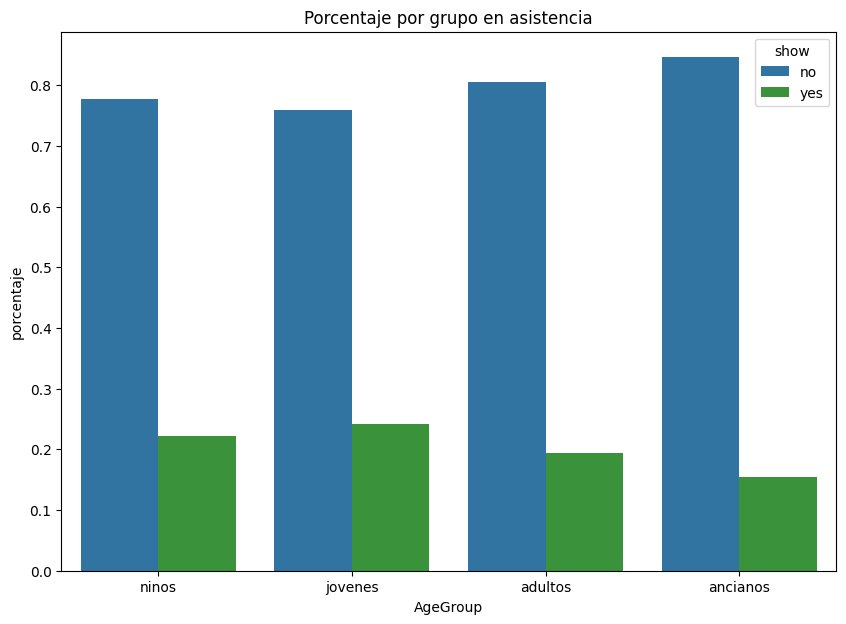

In [ ]:
plt.figure(figsize=[10,7])
sns.barplot(data=df_agegroup,x='AgeGroup',y='porcentaje',hue='show',
            palette=['tab:blue','tab:green'])
plt.title('Porcentaje por grupo en asistencia');

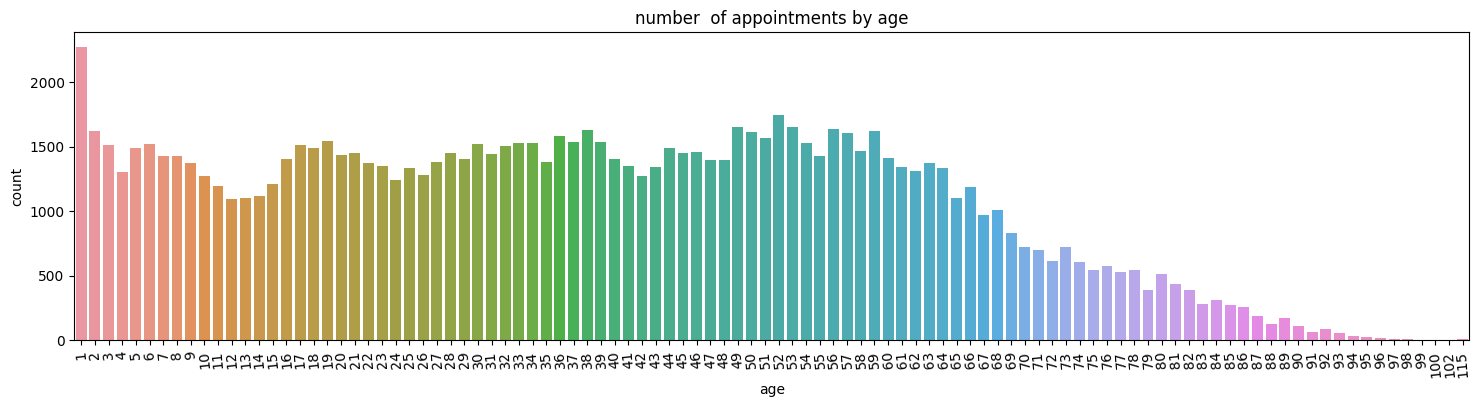

In [ ]:
plt.figure(figsize=(18,4))
plt.xticks(rotation=95)
ax = sns.countplot(x=df.age)
ax.set_title("number  of appointments by age")
plt.show()



*   Los niños y los ancianos tienen una mayor tasa de asistencia a las citas médicas en comparación con los jóvenes y los adultos.
*   Los jóvenes tienen la tasa más alta de no asistencia, seguidos por los adultos.
*   Los adultos y los ancianos presentan tasas de asistencia similares, siendo ligeramente más alta en los ancianos.






## **Conclusion and Recommendations**

-----------------------------------------------------------------
### **Conclusion**
-----------------------------------------------------------------

Se han importado las librerías necesarias para el análisis y se ha realizado una visión general del conjunto de datos, incluida una inspección de las primeras y últimas filas, la forma del conjunto de datos, información sobre los tipos de datos y un resumen de los datos. Además, se se hizo la limpieza de datos y la adición de una columna para agrupar por edad que en un futuro se podra utilizar para responder una pregunta.

En conclusión, el análisis de los datos de citas médicas no muestra una diferencia significativa en la tasa de inasistencia entre géneros, lo que indica que el género no es un factor determinante en la ausencia a las citas. A pesar de que las mujeres registran más citas que los hombres, la proporción de asistencia entre ambos géneros es comparable.

Un hallazgo notable es que la mayoría de los pacientes alcohólicos son hombres, representando el 63.6% del total. Además, un número considerable de pacientes no asistió a sus citas a pesar de haber recibido un SMS recordatorio, sugiriendo que mientras la comunicación vía SMS podría influir positivamente en la asistencia, no es determinante.

El análisis de la asistencia por barrios revela que "ILHAS OCEÂNICAS DE TRINDADE" destaca por un índice de inasistencia del 100%, lo que podría reflejar barreras específicas para acceder a servicios de salud en esa área.

Por último, se observa una mayor tasa de asistencia entre niños y ancianos, a diferencia de los jóvenes, quienes presentan la tasa más alta de inasistencia, seguida por los adultos. Este patrón invita a una investigación más profunda sobre las dinámicas y posibles barreras que afectan la asistencia de los jóvenes a las citas médicas.


--------------------------------------------------
### **Recommendation to business**
--------------------------------------------------

En vista de los resultados obtenidos, se advierte que la información disponible no permite discernir con precisión los motivos específicos que influyen en la asistencia a citas médicas en función del vecindario, tales como la distancia, la disponibilidad de transporte o factores socioeconómicos. En lo que respecta a la edad, se requiere un análisis más detallado para entender porca qué los jóvenes presentan una mayor inasistencia, considerando variables como ocupaciones o responsabilidades adicionales que podrían incidir en su disponibilidad. El estudio ha logrado abordar las preguntas iniciales planteadas, poniendo de manifiesto la complejidad de los factores que afectan la asistencia a las citas médicas.

---------------------------------
###  **Further Analysis**
---------------------------------

Aunque el estudio de las enfermedades crónicas no se consideró inicialmente de gran importancia, su impacto en la asistencia aún podría proporcionar insights valiosos y merece una exploración más exhaustiva.